<a href="https://colab.research.google.com/github/benamaranermine/predict-live-birth-occurrence-before-in-vitro-fertilization-treatment/blob/main/predict_live%E2%80%91birth_with_databalancing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # filter the warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC
from google.colab import drive



In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/ar-2015-2016-xlsb.xlsx'
data = pd.read_excel(file_path)

In [ ]:
for col in data:
    print(f"{col} has : {data[col].unique()} unique values\n")

Patient Age at Treatment has : ['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39' '999'] unique values

Date patient started trying to become pregnant OR date of last pregnancy has : [nan 13. 11. 10. 15. 16. 17. 14. 19. 12. 18. 20.  6.  9.  5.  8.  3.] unique values

Total Number of Previous cycles, Both IVF and DI has : ['2' '3' '0' '5' '>=5' '1' '4'] unique values

Total Number of Previous treatments, Both IVF and DI at clinic has : ['2' '3' '0' '5' '1' '>=5' '4'] unique values

Total Number of Previous IVF cycles has : ['2' '3' '0' '5' '4' '1' '>=5'] unique values

Total Number of Previous DI cycles has : ['0' '3' '>=5' '1' '2' '4' '5'] unique values

Total number of previous pregnancies, Both IVF and DI has : ['0' '1' '2' '4' '3' '5' '>=5'] unique values

Total number of IVF pregnancies has : ['0' '1' '2' '4' '3' '5' '>=5'] unique values

Total number of DI pregnancies has : [0 1 3 2 4] unique values

Total number of live births - conceived through IVF or DI has : [0 1 2 3 5 4] uni

In [ ]:
selected_features = [
    "Patient Age at Treatment",
    "Total Number of Previous IVF cycles",
    "Total number of IVF pregnancies",
    "Total number of live births - conceived through IVF",
    "Type of Infertility - Female Primary",
    "Type of Infertility - Female Secondary",
    "Type of Infertility - Male Primary",
    "Type of Infertility - Male Secondary",
    "Type of Infertility -Couple Primary",
    "Type of Infertility -Couple Secondary",
    "Cause  of Infertility - Tubal disease",
    "Cause of Infertility - Ovulatory Disorder",
    "Cause of Infertility - Male Factor",
    "Cause of Infertility - Patient Unexplained",
    "Cause of Infertility - Endometriosis",
    "Cause of Infertility - Cervical factors",
    "Cause of Infertility - Female Factors",
    "Cause of Infertility - Partner Sperm Concentration",
    "Cause of Infertility -  Partner Sperm Morphology",
    "Causes of Infertility - Partner Sperm Motility",
    "Cause of Infertility -  Partner Sperm Immunological factors",
    "Stimulation used",
    "Egg Source",
    "Sperm From",
    "Fresh Cycle",
    "Frozen Cycle",
    "Eggs Thawed",
    "Fresh Eggs Collected",
    "Eggs Mixed With Partner Sperm",
    "Embryos Transfered",
    "Number of Live Births"
]

# Keep only the selected features
df_selected = data[selected_features]



In [ ]:
# Keep only the selected features
df_selected = data[selected_features]




def convert_to_binary_classification(df):
    # Copy the original DataFrame
    df_selected = df.copy()


    # Set values greater than 1 to 1, and the rest to 0
    df_selected["Number of Live Births"] = df_selected["Number of Live Births"].apply(lambda x: 1 if x >= 1 else 0)


    return df_selected


# Assume `df` is your original DataFrame


# Convert the "Live-birth Occurrence" column to binary classification
df_selected = convert_to_binary_classification(df_selected)


# Display the result
print(df_selected["Number of Live Births"])





0        1
1        0
2        0
3        0
4        0
        ..
65530    1
65531    0
65532    1
65533    1
65534    0
Name: Number of Live Births, Length: 65535, dtype: int64


In [ ]:
for col in df_selected:
    print(f"{col} has : {df_selected[col].unique()} unique values\n")

Patient Age at Treatment has : ['40-42' '45-50' '35-37' '18 - 34' '43-44' '38-39' '999'] unique values

Total Number of Previous IVF cycles has : ['2' '3' '0' '5' '4' '1' '>=5'] unique values

Total number of IVF pregnancies has : ['0' '1' '2' '4' '3' '5' '>=5'] unique values

Total number of live births - conceived through IVF has : [0 1 2 3 5 4] unique values

Type of Infertility - Female Primary has : [0 1] unique values

Type of Infertility - Female Secondary has : [0 1] unique values

Type of Infertility - Male Primary has : [0 1] unique values

Type of Infertility - Male Secondary has : [0 1] unique values

Type of Infertility -Couple Primary has : [0 1] unique values

Type of Infertility -Couple Secondary has : [0 1] unique values

Cause  of Infertility - Tubal disease has : [0 1] unique values

Cause of Infertility - Ovulatory Disorder has : [0 1] unique values

Cause of Infertility - Male Factor has : [0 1] unique values

Cause of Infertility - Patient Unexplained has : [1 0] 

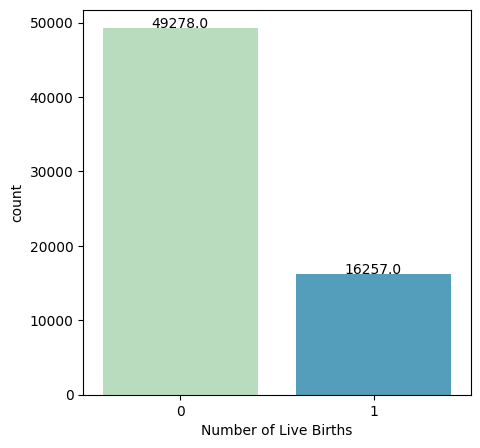

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df_selected["Number of Live Births"], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [ ]:
# The classes are heavily skewed we need to solve this issue later.
print('No Live birth occurrence', round(df_selected["Number of Live Births"].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Live birth occurrence', round(df_selected["Number of Live Births"].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Live birth occurrence 75.19 % of the dataset
Live birth occurrence 24.81 % of the dataset


In [ ]:
df_selected.rename(columns={"Number of Live Births": "Live birth occurrence"}, inplace=True)


In [ ]:
# Delete rows with Patient Age at Treatment = 999
df = df_selected[df_selected["Patient Age at Treatment"] != '999']


In [ ]:
def convert_age_range(age_range):
    if age_range == "18 - 34":
        return 0
    elif age_range ==  "35-37":
        return 1
    elif age_range == "38-39":
        return 2
    elif age_range == "40-42":
        return 3
    elif age_range ==  "43-44":
        return 4
    elif age_range ==  "45-50":
        return 5
    else:
        return None


In [ ]:
# Assume `df` is your DataFrame with the "Age Range" column

# Apply the conversion function to the "Age Range" column
df["Patient Age at Treatment"] = df["Patient Age at Treatment"].apply(convert_age_range).astype('Int64')



In [ ]:
for col in df:
    print(f"{col} has : {df[col].unique()} unique values\n")

Patient Age at Treatment has : <IntegerArray>
[3, 5, 1, 0, 4, 2]
Length: 6, dtype: Int64 unique values

Total Number of Previous IVF cycles has : ['2' '3' '0' '5' '4' '1' '>=5'] unique values

Total number of IVF pregnancies has : ['0' '1' '2' '4' '3' '5' '>=5'] unique values

Total number of live births - conceived through IVF has : [0 1 2 3 5 4] unique values

Type of Infertility - Female Primary has : [0 1] unique values

Type of Infertility - Female Secondary has : [0 1] unique values

Type of Infertility - Male Primary has : [0 1] unique values

Type of Infertility - Male Secondary has : [0 1] unique values

Type of Infertility -Couple Primary has : [0 1] unique values

Type of Infertility -Couple Secondary has : [0 1] unique values

Cause  of Infertility - Tubal disease has : [0 1] unique values

Cause of Infertility - Ovulatory Disorder has : [0 1] unique values

Cause of Infertility - Male Factor has : [0 1] unique values

Cause of Infertility - Patient Unexplained has : [1 0] 

In [ ]:
df.isnull().sum()


Patient Age at Treatment                                       0
Total Number of Previous IVF cycles                            0
Total number of IVF pregnancies                                0
Total number of live births - conceived through IVF            0
Type of Infertility - Female Primary                           0
Type of Infertility - Female Secondary                         0
Type of Infertility - Male Primary                             0
Type of Infertility - Male Secondary                           0
Type of Infertility -Couple Primary                            0
Type of Infertility -Couple Secondary                          0
Cause  of Infertility - Tubal disease                          0
Cause of Infertility - Ovulatory Disorder                      0
Cause of Infertility - Male Factor                             0
Cause of Infertility - Patient Unexplained                     0
Cause of Infertility - Endometriosis                           0
Cause of Infertility - Ce

In [ ]:
# Drop rows with NaN values
#df.dropna(inplace=True)




In [ ]:
#X = df.loc[:, df.columns != 'Live birth occurrence']
#X = X.apply(pd.to_numeric, errors='coerce')
#df1=X.fillna(X.median())


In [ ]:
#Y = df['Live birth occurrence']

In [ ]:
#df=pd.concat([df1, Y], axis=1, join='inner')


In [ ]:
df.loc[df['Total Number of Previous IVF cycles'] == '>=5', 'Total Number of Previous IVF cycles'] = 6
df['Total Number of Previous IVF cycles'] = df['Total Number of Previous IVF cycles'].astype(int)


In [ ]:
df.loc[df['Fresh Eggs Collected'] == '> 50', 'Fresh Eggs Collected'] = 60
df['Fresh Eggs Collected'] = df['Fresh Eggs Collected'].astype(int)

In [ ]:
df.loc[df['Eggs Mixed With Partner Sperm'] == '> 50', 'Eggs Mixed With Partner Sperm'] = 60
df['Eggs Mixed With Partner Sperm'] = df['Eggs Mixed With Partner Sperm'].astype(int)

In [ ]:
df.loc[df['Total number of IVF pregnancies'] == '>=5', 'Total number of IVF pregnancies'] = 6
df['Total number of IVF pregnancies'] = df['Total number of IVF pregnancies'].astype(int)


In [ ]:
df=df.drop(['Egg Source','Sperm From','Cause of Infertility -  Partner Sperm Immunological factors','Stimulation used'], axis=1)

In [ ]:
df=df.drop(['Cause of Infertility - Female Factors'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64442 entries, 0 to 65534
Data columns (total 26 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   Patient Age at Treatment                             64442 non-null  Int64
 1   Total Number of Previous IVF cycles                  64442 non-null  int64
 2   Total number of IVF pregnancies                      64442 non-null  int64
 3   Total number of live births - conceived through IVF  64442 non-null  int64
 4   Type of Infertility - Female Primary                 64442 non-null  int64
 5   Type of Infertility - Female Secondary               64442 non-null  int64
 6   Type of Infertility - Male Primary                   64442 non-null  int64
 7   Type of Infertility - Male Secondary                 64442 non-null  int64
 8   Type of Infertility -Couple Primary                  64442 non-null  int64
 9   Type o

In [ ]:
shape = df.shape


In [ ]:
shape

(64442, 26)

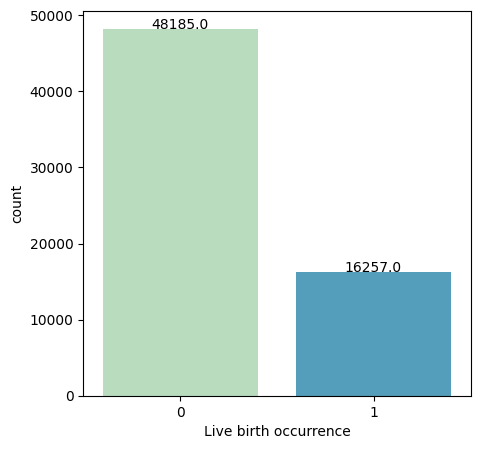

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df["Live birth occurrence"], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

#Scale Data

In [ ]:
from sklearn.utils import resample

# Separate the majority and minority classes
df_majority = df[df['Live birth occurrence'] == 0]
df_minority = df[df['Live birth occurrence'] == 1]

# Downsample the majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # Set to False for undersampling
                                   n_samples=16257,  # Specify the desired number of samples
                                   random_state=42)  # Set a random state for reproducibility

# Combine the downsampled majority class with the minority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the DataFrame if needed
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)


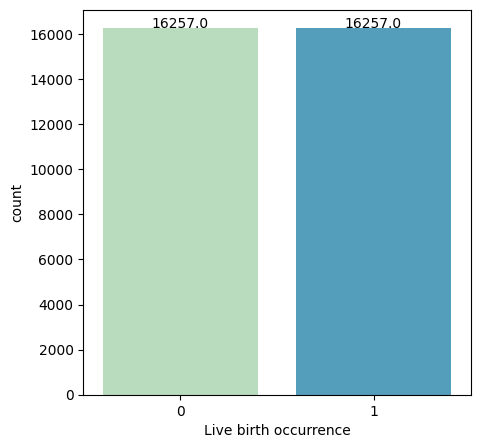

In [ ]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(x = df_downsampled["Live birth occurrence"], palette="GnBu")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [ ]:
X = df_downsampled.drop(['Live birth occurrence'], axis=1)


In [ ]:
Y = df_downsampled['Live birth occurrence']


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the columns from the DataFrame
cols = X.columns

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
scaled_features = scaler.fit_transform(X)

# Create new DataFrames for scaled features
X = pd.DataFrame(scaled_features, columns=cols)


In [ ]:
X.shape

(32514, 25)

In [ ]:
Y.shape

(32514,)

In [ ]:
new_df=pd.concat([X, Y], axis=1, join='inner')


#Split Data into test and train

In [ ]:
# split the dataset
SEED=23
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,shuffle=True, stratify=Y, random_state=SEED)
#With random_state=0 , we get the same train and test sets across different executions


#Modeling

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
# Step 3: Design the deep learning model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/10
712/712 [==============================] - 2s 2ms/step - loss: 0.5998 - accuracy: 0.6500 - val_loss: 0.5797 - val_accuracy: 0.6613
Epoch 2/10
712/712 [==============================] - 1s 1ms/step - loss: 0.5747 - accuracy: 0.6660 - val_loss: 0.5732 - val_accuracy: 0.6655
Epoch 3/10
712/712 [==============================] - 1s 1ms/step - loss: 0.5716 - accuracy: 0.6705 - val_loss: 0.5726 - val_accuracy: 0.6662
Epoch 4/10
712/712 [==============================] - 1s 2ms/step - loss: 0.5695 - accuracy: 0.6705 - val_loss: 0.5707 - val_accuracy: 0.6655
Epoch 5/10
712/712 [==============================] - 2s 3ms/step - loss: 0.5681 - accuracy: 0.6713 - val_loss: 0.5730 - val_accuracy: 0.6685
Epoch 6/10
712/712 [==============================] - 3s 4ms/step - loss: 0.5673 - accuracy: 0.6741 - val_loss: 0.5713 - val_accuracy: 0.6665
Epoch 7/10
712/712 [==============================] - 1s 2ms/step - loss: 0.5666 - accuracy: 0.6735 - val_loss: 0.5707 - val_accuracy: 0.6651
Epoch 

In [ ]:
# Step 6: Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print('Validation loss:', loss)
print('Validation accuracy:', accuracy)

305/305 [==============================] - 0s 1ms/step - loss: 0.5768 - accuracy: 0.6639
Validation loss: 0.5767509937286377
Validation accuracy: 0.6638646721839905


In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions and true labels for the validation set
y_pred = model.predict(X_test)
auc = roc_auc_score(Y_test, y_pred)

print("AUC:", auc)

305/305 [==============================] - 0s 773us/step
AUC: 0.7172665908533189


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions and true labels for the validation set
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)  # Convert predicted probabilities to binary labels

precision = precision_score(Y_test, y_pred_binary)
recall = recall_score(Y_test, y_pred_binary)
f1 = f1_score(Y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


305/305 [==============================] - 0s 1ms/step
Precision: 0.6070711128967456
Recall: 0.9292742927429274
F1 Score: 0.7343863912515188


In [ ]:
model.save('/content/drive/MyDrive/my_model.h5')


#Model2

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

def create_model(input_shape):
    inputs = Input(shape=input_shape)
    hidden = Dense(64, activation='relu')(inputs)
    hidden = Dense(64, activation='relu')(hidden)
    outputs = Dense(1, activation='sigmoid')(hidden)
    model = Model(inputs=inputs, outputs=outputs)
    return model


In [ ]:
# Define the input shape based on the number of features
input_shape = (25,)

# Create the model
model = create_model(input_shape)


In [ ]:
# Create the model
pretrained_model = create_model(input_shape)

In [ ]:
pretrained_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
pretrained_model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))


Epoch 1/10
712/712 [==============================] - 2s 2ms/step - loss: 0.6000 - accuracy: 0.6499 - val_loss: 0.5805 - val_accuracy: 0.6610
Epoch 2/10
712/712 [==============================] - 1s 2ms/step - loss: 0.5753 - accuracy: 0.6663 - val_loss: 0.5749 - val_accuracy: 0.6612
Epoch 3/10
712/712 [==============================] - 1s 1ms/step - loss: 0.5719 - accuracy: 0.6679 - val_loss: 0.5768 - val_accuracy: 0.6599
Epoch 4/10
712/712 [==============================] - 1s 2ms/step - loss: 0.5706 - accuracy: 0.6690 - val_loss: 0.5754 - val_accuracy: 0.6678
Epoch 5/10
712/712 [==============================] - 1s 2ms/step - loss: 0.5692 - accuracy: 0.6722 - val_loss: 0.5741 - val_accuracy: 0.6628
Epoch 6/10
712/712 [==============================] - 1s 2ms/step - loss: 0.5677 - accuracy: 0.6723 - val_loss: 0.5737 - val_accuracy: 0.6661
Epoch 7/10
712/712 [==============================] - 1s 2ms/step - loss: 0.5665 - accuracy: 0.6739 - val_loss: 0.5729 - val_accuracy: 0.6705
Epoch 

In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions and true labels for the validation set
y_pred = pretrained_model.predict(X_test)
auc = roc_auc_score(Y_test, y_pred)

print("AUC:", auc)

305/305 [==============================] - 0s 761us/step
AUC: 0.7159545062746095


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predictions and true labels for the validation set
y_pred = pretrained_model.predict(X_test)
y_pred_binary = np.round(y_pred).astype(int)  # Convert predicted probabilities to binary labels

precision = precision_score(Y_test, y_pred_binary)
recall = recall_score(Y_test, y_pred_binary)
f1 = f1_score(Y_test, y_pred_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


305/305 [==============================] - 0s 710us/step
Precision: 0.6225675064112234
Recall: 0.8460434604346043
F1 Score: 0.7173025115147301


In [ ]:
pretrained_model.save('/content/drive/MyDrive/my_model2.h5')


#Model3

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
def create_pretrained_model(input_shape, num_classes):
    # Define the architecture of your pretrained model
    input_layer = Input(shape=input_shape)
    hidden_layer = Dense(64, activation='relu')(input_layer)
    output_layer = Dense(num_classes, activation='softmax')(hidden_layer)
    pretrained_model = Model(inputs=input_layer, outputs=output_layer)
    return pretrained_model

# Create the pretrained model with a specific input shape and number of classes
input_shape = (25,)  # Change this to the desired input shape
num_classes = 2  # Change this to the appropriate number of output classes
pretrained_model = create_pretrained_model(input_shape, num_classes)

In [ ]:
# Assuming you have a binary classification problem
num_classes = 2

# Convert the true labels to one-hot encoding if they are not already
y_train_one_hot = tf.keras.utils.to_categorical(Y_train, num_classes)
y_val_one_hot = tf.keras.utils.to_categorical(Y_test, num_classes)

# Compile and train the new model
pretrained_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
pretrained_model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_val_one_hot))


Epoch 1/10
712/712 [==============================] - 3s 3ms/step - loss: 0.6254 - accuracy: 0.6318 - val_loss: 0.5963 - val_accuracy: 0.6518
Epoch 2/10
712/712 [==============================] - 2s 3ms/step - loss: 0.5865 - accuracy: 0.6599 - val_loss: 0.5826 - val_accuracy: 0.6644
Epoch 3/10
712/712 [==============================] - 2s 3ms/step - loss: 0.5789 - accuracy: 0.6652 - val_loss: 0.5782 - val_accuracy: 0.6674
Epoch 4/10
712/712 [==============================] - 2s 3ms/step - loss: 0.5755 - accuracy: 0.6655 - val_loss: 0.5794 - val_accuracy: 0.6653
Epoch 5/10
712/712 [==============================] - 2s 3ms/step - loss: 0.5737 - accuracy: 0.6685 - val_loss: 0.5748 - val_accuracy: 0.6646
Epoch 6/10
712/712 [==============================] - 2s 3ms/step - loss: 0.5727 - accuracy: 0.6663 - val_loss: 0.5755 - val_accuracy: 0.6679
Epoch 7/10
712/712 [==============================] - 2s 2ms/step - loss: 0.5720 - accuracy: 0.6676 - val_loss: 0.5726 - val_accuracy: 0.6665
Epoch 

In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions and true labels for the validation set
y_pred = pretrained_model.predict(X_test)
auc = roc_auc_score(y_val_one_hot, y_pred)

print("AUC:", auc)

305/305 [==============================] - 1s 2ms/step
AUC: 0.7141155092604852


In [ ]:
pretrained_model.save('/content/drive/MyDrive/my_model3.h5')


#Model 4

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Train a random forest classifier on the original dataset
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluate the accuracy of the random forest model on the test set
accuracy = clf.score(X_test, Y_test)
print("Accuracy on original dataset:", accuracy)

Accuracy on original dataset: 0.6385443362378268


In [ ]:
import joblib

# Save the pretrained model to a file
joblib.dump(clf, '/content/drive/MyDrive/pretrained_model4.pkl')


['/content/drive/MyDrive/pretrained_model4.pkl']

#  random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=25, random_state=12)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, clf_rf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.67      0.55      0.60      4877
           1       0.62      0.72      0.67      4878

    accuracy                           0.64      9755
   macro avg       0.64      0.64      0.63      9755
weighted avg       0.64      0.64      0.63      9755



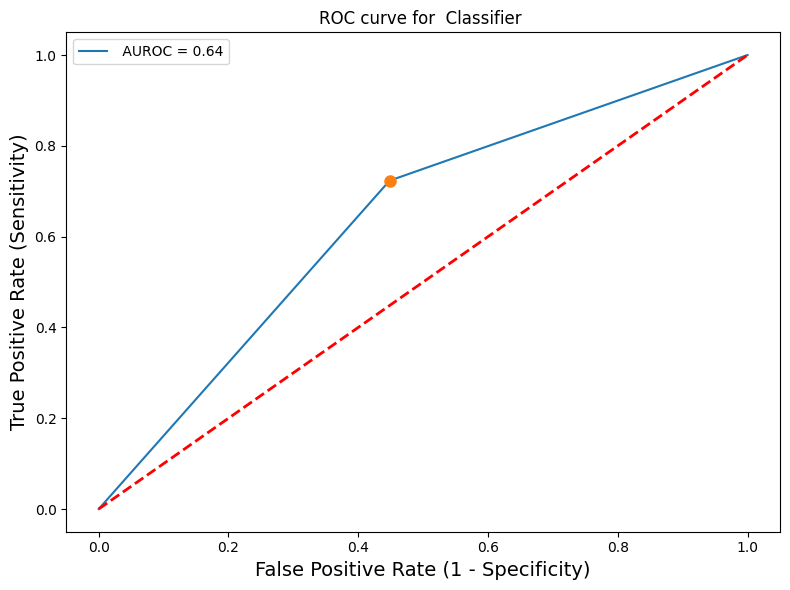

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test, clf_rf.predict(X_test))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

#XGBoost Classifer

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, xgb_clf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.76      0.50      0.60      4877
           1       0.63      0.84      0.72      4878

    accuracy                           0.67      9755
   macro avg       0.69      0.67      0.66      9755
weighted avg       0.69      0.67      0.66      9755



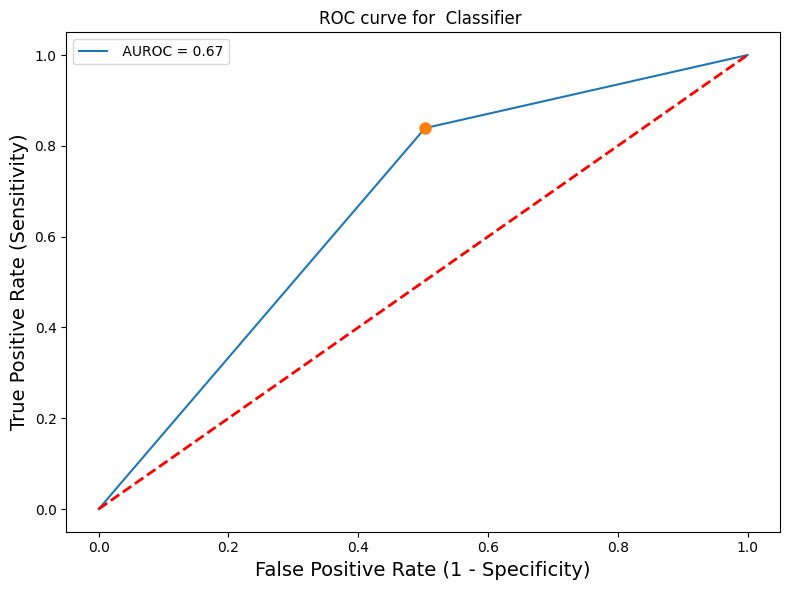

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test, xgb_clf.predict(X_test))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')



plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,Y_train)
    train_score.append(accuracy_score(Y_test, model.predict(X_test)))
#     test_score.append(accuracy_score(y_test, model.predict(X_test)))

Maximum KNN score on the test data: 64.92%


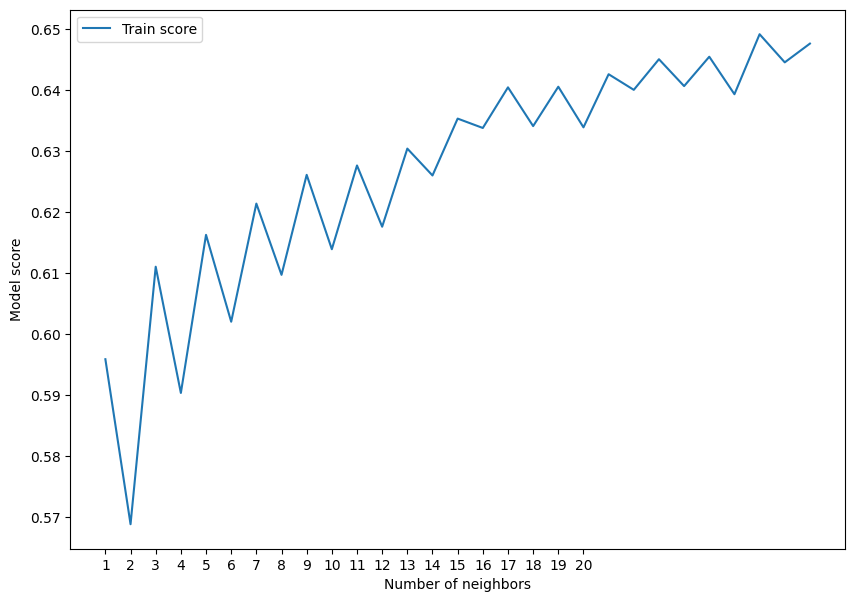

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=26)


In [ ]:
knn_clf.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=26)

In [ ]:
print(classification_report(Y_test, knn_clf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.67      0.54      0.60      4877
           1       0.62      0.74      0.67      4878

    accuracy                           0.64      9755
   macro avg       0.65      0.64      0.64      9755
weighted avg       0.65      0.64      0.64      9755



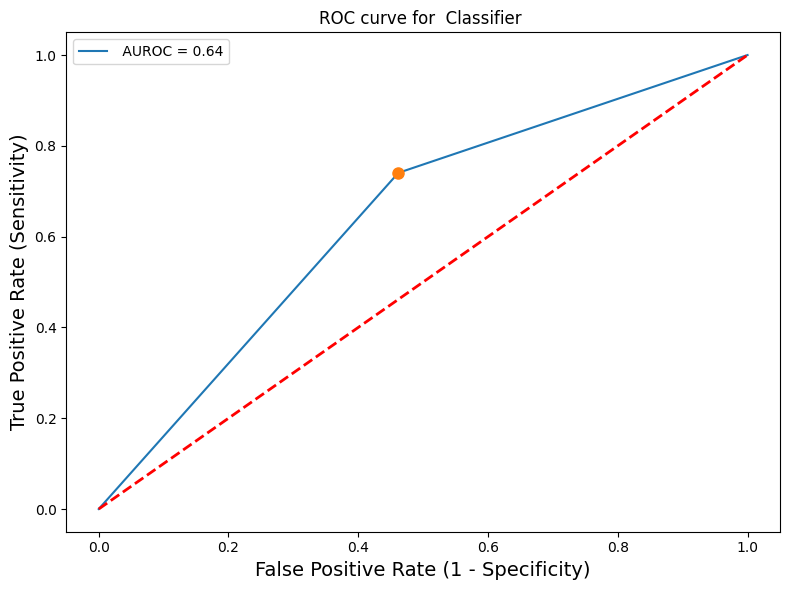

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test, knn_clf.predict(X_test))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

#SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, Y_train)

SVC(gamma=0.1)

In [ ]:
print(classification_report(Y_test, svm_clf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.79      0.45      0.57      4877
           1       0.61      0.88      0.72      4878

    accuracy                           0.66      9755
   macro avg       0.70      0.66      0.65      9755
weighted avg       0.70      0.66      0.65      9755



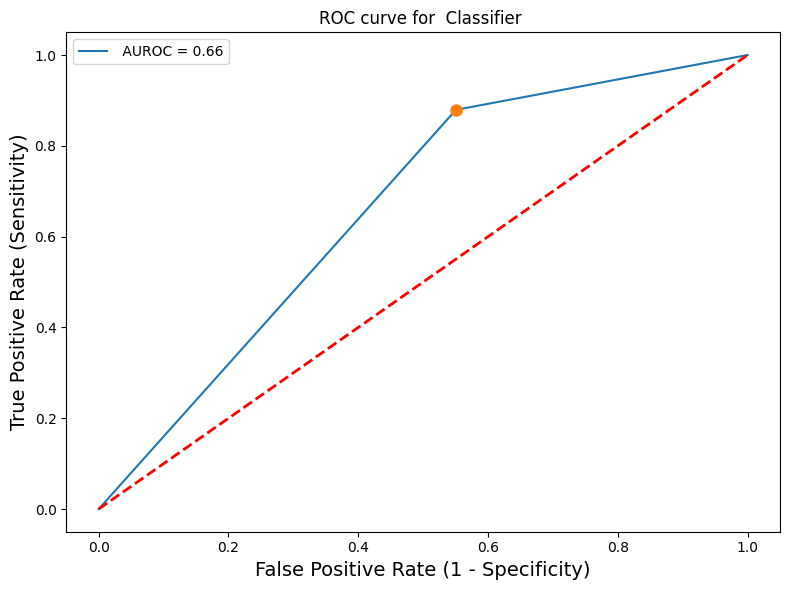

In [ ]:
from sklearn.metrics import roc_curve, auc

fig, (ax2) = plt.subplots(figsize = (8,6))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(Y_test, svm_clf.predict(X_test))
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

#Feature Importance

In [ ]:
def feature_imp(df, model):
    fi = pd.DataFrame()
    fi["feature"] = df.columns
    fi["importance"] = model.feature_importances_
    return fi.sort_values(by="importance", ascending=False)

<Axes: >

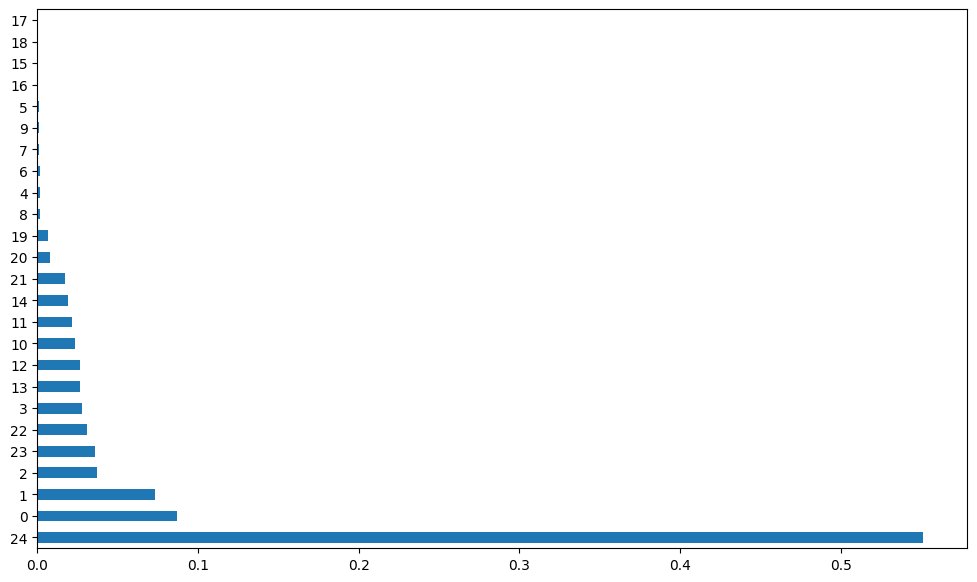

In [ ]:
feature_imp(X,clf_rf).plot(kind='barh', figsize=(12,7), legend=False)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64442 entries, 0 to 64441
Data columns (total 25 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Patient Age at Treatment                             64442 non-null  float64
 1   Total Number of Previous IVF cycles                  64442 non-null  float64
 2   Total number of IVF pregnancies                      64442 non-null  float64
 3   Total number of live births - conceived through IVF  64442 non-null  float64
 4   Type of Infertility - Female Primary                 64442 non-null  float64
 5   Type of Infertility - Female Secondary               64442 non-null  float64
 6   Type of Infertility - Male Primary                   64442 non-null  float64
 7   Type of Infertility - Male Secondary                 64442 non-null  float64
 8   Type of Infertility -Couple Primary                  64442 non-nul